In [20]:
import sys
from pathlib import Path

# Add current directory to Python path for module imports
current_dir = Path.cwd()
if str(current_dir) not in sys.path:
    sys.path.insert(0, str(current_dir))

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

from version_comparison import (
    read_benchmarks,
    plot_performance_over_time,
    plot_commit_comparison,
    plot_performance_distribution,
    plot_simple_comparison,
    generate_performance_summary
)

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

## Load Benchmark Data

In [21]:
# Read all benchmark data
print("Loading benchmark data...")
dfr = read_benchmarks()

print(f"\nLoaded {len(dfr)} benchmark results")
print(f"Commits found: {dfr['commit_id'].nunique()}")
print(f"Date range: {dfr['date'].min()} to {dfr['date'].max()}")
print(f"\nExperiments: {sorted(dfr['experiment'].unique())}")

dfr.head()

Loading benchmark data...

Loaded 1582 benchmark results
Commits found: 6
Date range: 2025-11-30 13:19:48+00:00 to 2025-12-04 19:15:31+00:00

Experiments: ['Delete Triples', 'Insert Triples', 'SearchFlatMap', 'TripleIndex Class Insert', 'Triples FirstObject', 'Triples Objects']


,date,version,commit_id,filename,runtime,cpu,origin,group,experiment,implementation,sampleSize,category,n_samples,min_ns,max_ns,avg_ns,p75_ns,p99_ns,p995_ns,p999_ns
0,2025-12-01 21:07:23+00:00,0.0.27,3fefabe36378b072ddbc17bb6b85bbd0dee4bc2e,bench_2025-12-01T21:07:23+00:00.json,Deno/1.46.3 x86_64-unknown-linux-gnu,AMD Ryzen 7 7840U w/ Radeon 780M Graphics,file:///home/rg/Code/tribbledb/benchmark/accessors.bench.ts,None,Triples FirstObject,unknown,5000,"NodeIDTypeQS, high uniqueness",17,383541.0,1449666.0,711682.0,937042.0,1449666.0,1449666.0,1449666.0
1,2025-12-01 21:07:23+00:00,0.0.27,3fefabe36378b072ddbc17bb6b85bbd0dee4bc2e,bench_2025-12-01T21:07:23+00:00.json,Deno/1.46.3 x86_64-unknown-linux-gnu,AMD Ryzen 7 7840U w/ Radeon 780M Graphics,file:///home/rg/Code/tribbledb/benchmark/accessors.bench.ts,None,Triples FirstObject,unknown,10000,"NodeIDTypeQS, high uniqueness",14,873853.0,2931703.0,1884626.0,2452050.0,2931703.0,2931703.0,2931703.0
2,2025-12-01 21:07:23+00:00,0.0.27,3fefabe36378b072ddbc17bb6b85bbd0dee4bc2e,bench_2025-12-01T21:07:23+00:00.json,Deno/1.46.3 x86_64-unknown-linux-gnu,AMD Ryzen 7 7840U w/ Radeon 780M Graphics,file:///home/rg/Code/tribbledb/benchmark/accessors.bench.ts,None,Triples FirstObject,unknown,15000,"NodeIDTypeQS, high uniqueness",13,1386728.0,10612005.0,5176620.0,7561448.0,10612005.0,10612005.0,10612005.0
3,2025-12-01 21:07:23+00:00,0.0.27,3fefabe36378b072ddbc17bb6b85bbd0dee4bc2e,bench_2025-12-01T21:07:23+00:00.json,Deno/1.46.3 x86_64-unknown-linux-gnu,AMD Ryzen 7 7840U w/ Radeon 780M Graphics,file:///home/rg/Code/tribbledb/benchmark/accessors.bench.ts,None,Triples FirstObject,unknown,20000,"NodeIDTypeQS, high uniqueness",12,1952081.0,8531973.0,3783098.0,4186703.0,8531973.0,8531973.0,8531973.0
4,2025-12-01 21:07:23+00:00,0.0.27,3fefabe36378b072ddbc17bb6b85bbd0dee4bc2e,bench_2025-12-01T21:07:23+00:00.json,Deno/1.46.3 x86_64-unknown-linux-gnu,AMD Ryzen 7 7840U w/ Radeon 780M Graphics,file:///home/rg/Code/tribbledb/benchmark/accessors.bench.ts,None,Triples FirstObject,unknown,25000,"NodeIDTypeQS, high uniqueness",12,2730174.0,5181033.0,4076594.0,4693807.0,5181033.0,5181033.0,5181033.0


## Performance Summary by Commit

In [22]:
# Generate summary statistics
summary = generate_performance_summary(dfr)

print("Performance Summary by Commit:\n")
summary[['commit_id', 'date', 'version', 'mean_time_ms', 'median_time_ms', 'num_benchmarks']].round(2)

Performance Summary by Commit:



,commit_id,date,version,mean_time_ms,median_time_ms,num_benchmarks
2,5a7971a652020d4100ba6d59442c93dfff83b823,2025-11-30 13:19:48+00:00,0.0.24,183.91,30.44,75
7,641ec2bc53704f742c22322507a08c2e31adb903,2025-11-30 14:19:47+00:00,0.0.24,173.31,34.05,85
8,7f50aba95e12807e5361dec8b96a91532066e836,2025-11-30 14:47:04+00:00,0.0.24,149.78,27.52,160
9,7f50aba95e12807e5361dec8b96a91532066e836,2025-11-30 18:57:11+00:00,0.0.24,47.74,40.81,35
10,7f50aba95e12807e5361dec8b96a91532066e836,2025-11-30 19:41:53+00:00,0.0.24,54.65,49.80,35
11,7f50aba95e12807e5361dec8b96a91532066e836,2025-11-30 19:45:21+00:00,0.0.24,51.52,44.64,35
12,7f50aba95e12807e5361dec8b96a91532066e836,2025-11-30 19:54:39+00:00,0.0.24,51.63,43.76,35
0,3fefabe36378b072ddbc17bb6b85bbd0dee4bc2e,2025-12-01 21:07:23+00:00,0.0.27,116.73,33.09,130
1,3fefabe36378b072ddbc17bb6b85bbd0dee4bc2e,2025-12-01 21:43:38+00:00,0.0.27,35.99,26.42,30
13,f45c94b312a5e15a373a108246c714f9cd8ea348,2025-12-02 08:12:05+00:00,0.0.28,129.15,32.26,30


## Unique Commits Overview

In [23]:
# Show unique commits with their dates
commits_info = dfr.groupby('commit_id').agg({
    'date': 'first',
    'version': 'first',
    'experiment': 'count'
}).reset_index()
commits_info.columns = ['commit_id', 'date', 'version', 'num_benchmarks']
commits_info = commits_info.sort_values('date')

print(f"Total unique commits: {len(commits_info)}\n")
commits_info

Total unique commits: 6



,commit_id,date,version,num_benchmarks
1,5a7971a652020d4100ba6d59442c93dfff83b823,2025-11-30 13:19:48+00:00,0.0.24,75
3,641ec2bc53704f742c22322507a08c2e31adb903,2025-11-30 14:19:47+00:00,0.0.24,85
4,7f50aba95e12807e5361dec8b96a91532066e836,2025-11-30 18:57:11+00:00,0.0.24,300
0,3fefabe36378b072ddbc17bb6b85bbd0dee4bc2e,2025-12-01 21:07:23+00:00,0.0.27,160
5,f45c94b312a5e15a373a108246c714f9cd8ea348,2025-12-02 08:12:05+00:00,0.0.28,30
2,61cc77ccaac4a5a571e1e0f4aed49425b33d969d,2025-12-04 16:46:11+00:00,0.0.29,932


In [24]:
# Show available experiments and categories
print("Available experiments:")
for exp in sorted(dfr['experiment'].unique()):
    categories = dfr[dfr['experiment'] == exp]['category'].unique()
    print(f"  {exp}: {len(categories)} categories")

# Create a simple comparison for Insert Triples
if 'Insert Triples' in dfr['experiment'].values:
    from IPython.display import Image

    plot_simple_comparison(
        dfr,
        experiment='Insert Triples',
        category='NodeID',
        metric='avg_ns',
        output_path='insert_triples_comparison.png'
    )
    Image('insert_triples_comparison.png')

Available experiments:
  Delete Triples: 3 categories
  Insert Triples: 7 categories
  SearchFlatMap: 6 categories
  TripleIndex Class Insert: 1 categories
  Triples FirstObject: 1 categories
  Triples Objects: 1 categories
Saved simple comparison plot to insert_triples_comparison.png
Saved simple comparison plot to insert_triples_comparison.png


## Quick Experiment Overview

Simple, focused plots for specific experiments.

## Performance Over Time

This plot shows how performance has changed across different commits over time.

In [ ]:
# Reload the module to pick up changes
import importlib
import version_comparison
importlib.reload(version_comparison)

from version_comparison import (
    plot_performance_over_time,
    plot_commit_comparison,
    plot_performance_distribution,
    plot_simple_comparison
)

## Reload Module

Reload the module to pick up dimension changes.

Auto-selected sample sizes: [np.int64(1000), np.int64(20000), np.int64(100000)]
Saved performance over time plot to performance_over_time.png
Saved performance over time plot to performance_over_time.png


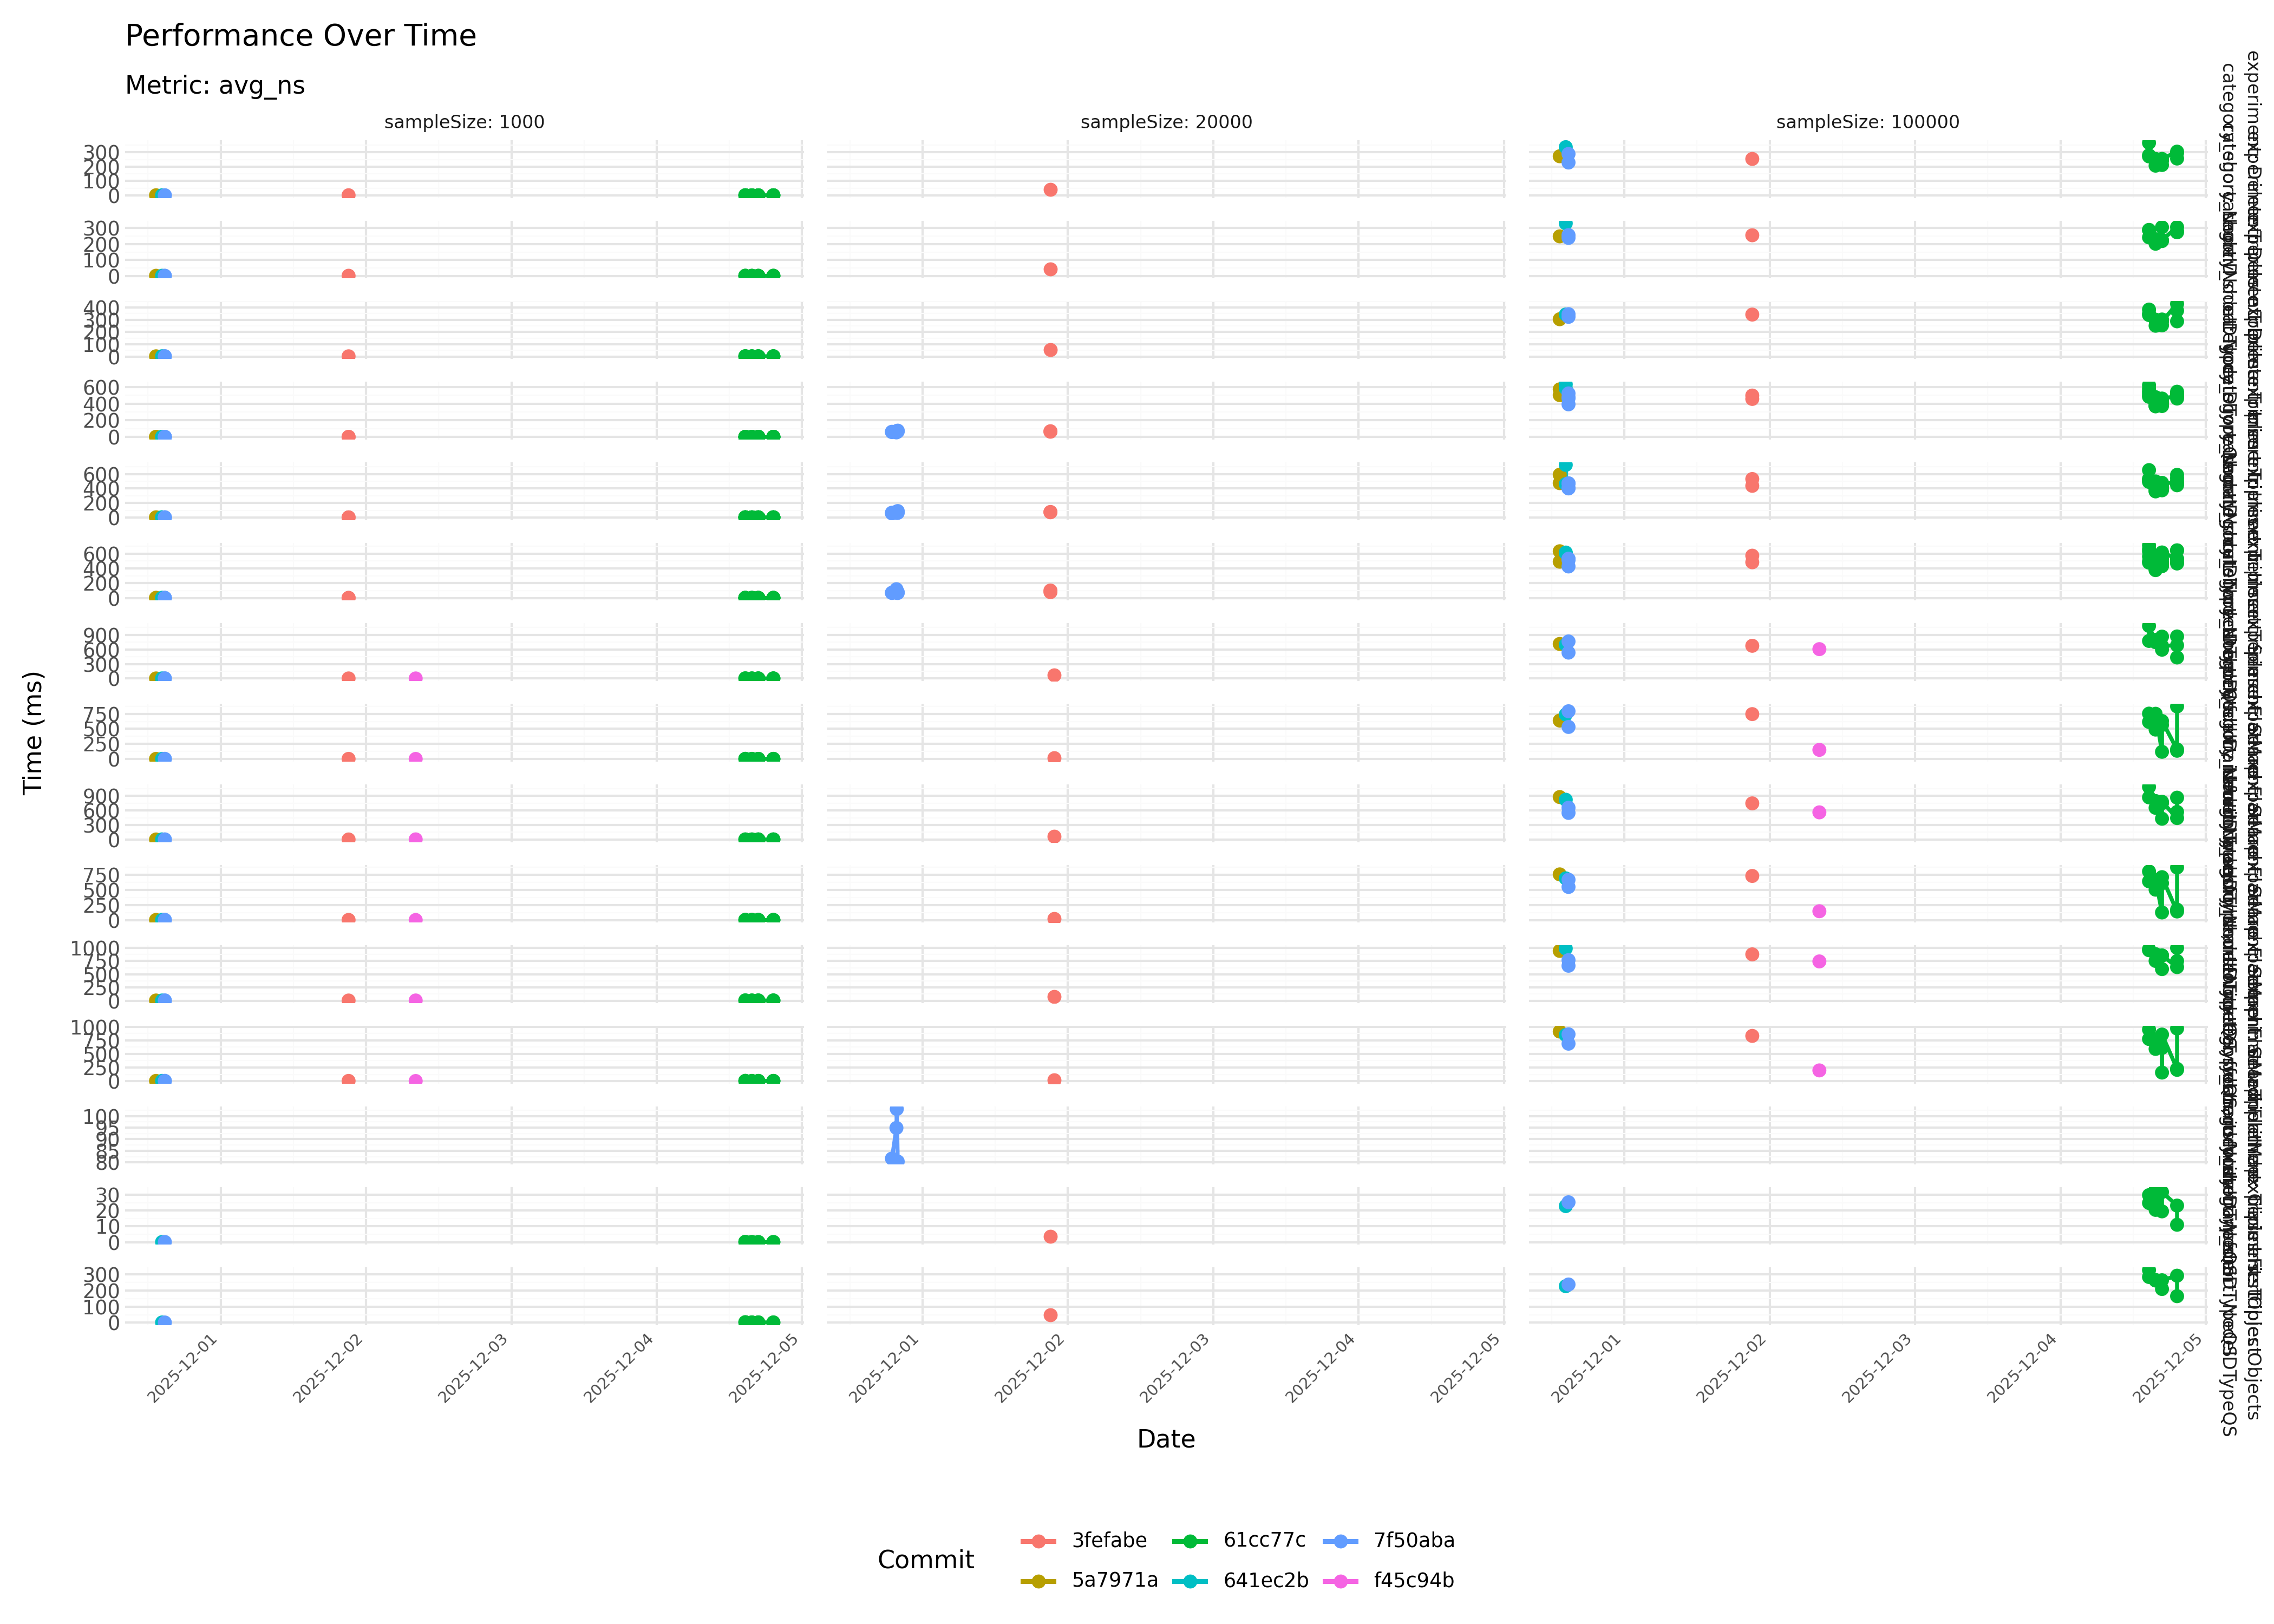

In [25]:
# Plot performance over time for all experiments
plot_performance_over_time(
    dfr,
    metric='avg_ns',
    output_path='performance_over_time.png'
)

# Display the plot
from IPython.display import Image
Image('performance_over_time.png')

## Performance Over Time - P99 Metric

Looking at the 99th percentile to understand worst-case performance.

Auto-selected sample sizes: [np.int64(1000), np.int64(20000), np.int64(100000)]
Saved performance over time plot to performance_over_time_p99.png
Saved performance over time plot to performance_over_time_p99.png


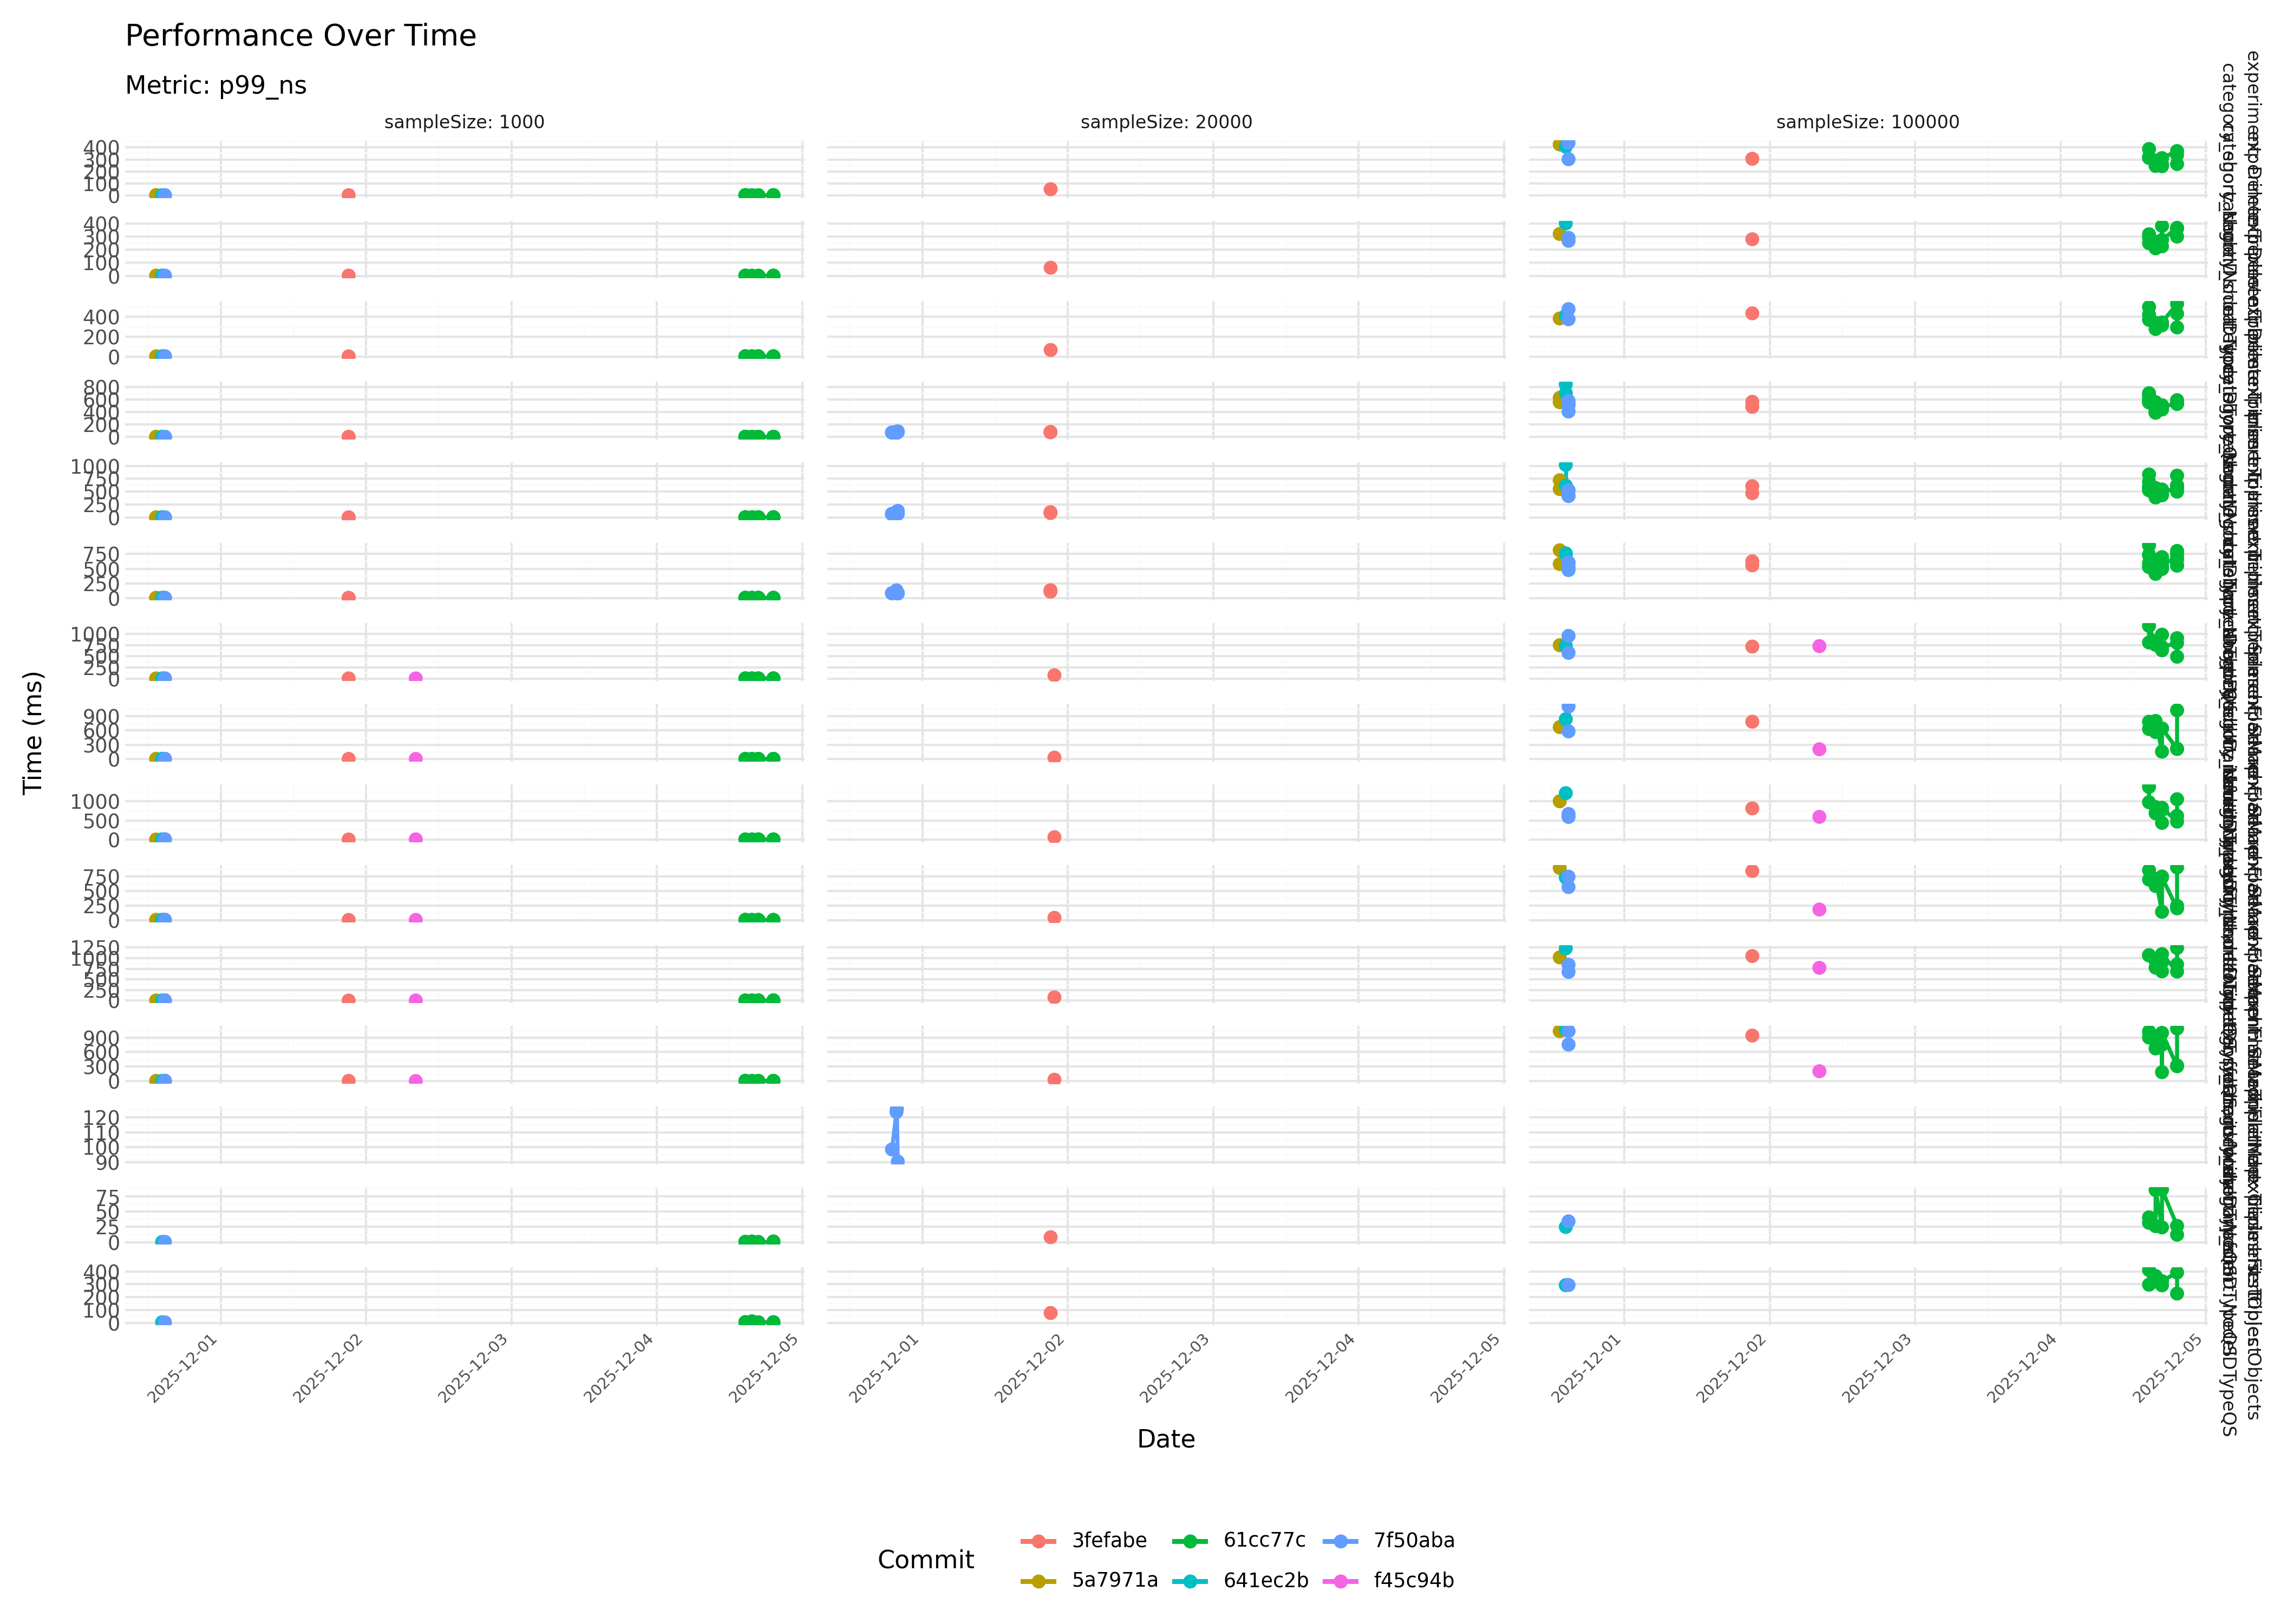

In [26]:
# Plot P99 performance over time
plot_performance_over_time(
    dfr,
    metric='p99_ns',
    output_path='performance_over_time_p99.png'
)

Image('performance_over_time_p99.png')

## Commit Comparison (vs Baseline)

Compare all commits against the earliest commit to see relative performance changes.

In [27]:
# Get the earliest commit as baseline
unique_commits = dfr.sort_values('date')['commit_id'].unique()

if len(unique_commits) >= 2:
    baseline_commit = unique_commits[0]
    print(f"Using baseline commit: {baseline_commit[:7]}")

    plot_commit_comparison(
        dfr,
        baseline_commit=baseline_commit,
        metric='avg_ns',
        output_path='commit_comparison.png'
    )

    Image('commit_comparison.png')
else:
    print("Not enough commits for comparison (need at least 2)")

Using baseline commit: 5a7971a
Auto-selected sample sizes: [np.int64(1000), np.int64(20000), np.int64(100000)]
Saved commit comparison plot to commit_comparison.png
Saved commit comparison plot to commit_comparison.png


## Performance Distribution

Violin and box plots showing the distribution of performance across commits.

Using sample size: 100000
Saved performance distribution plot to performance_distribution.png
Saved performance distribution plot to performance_distribution.png


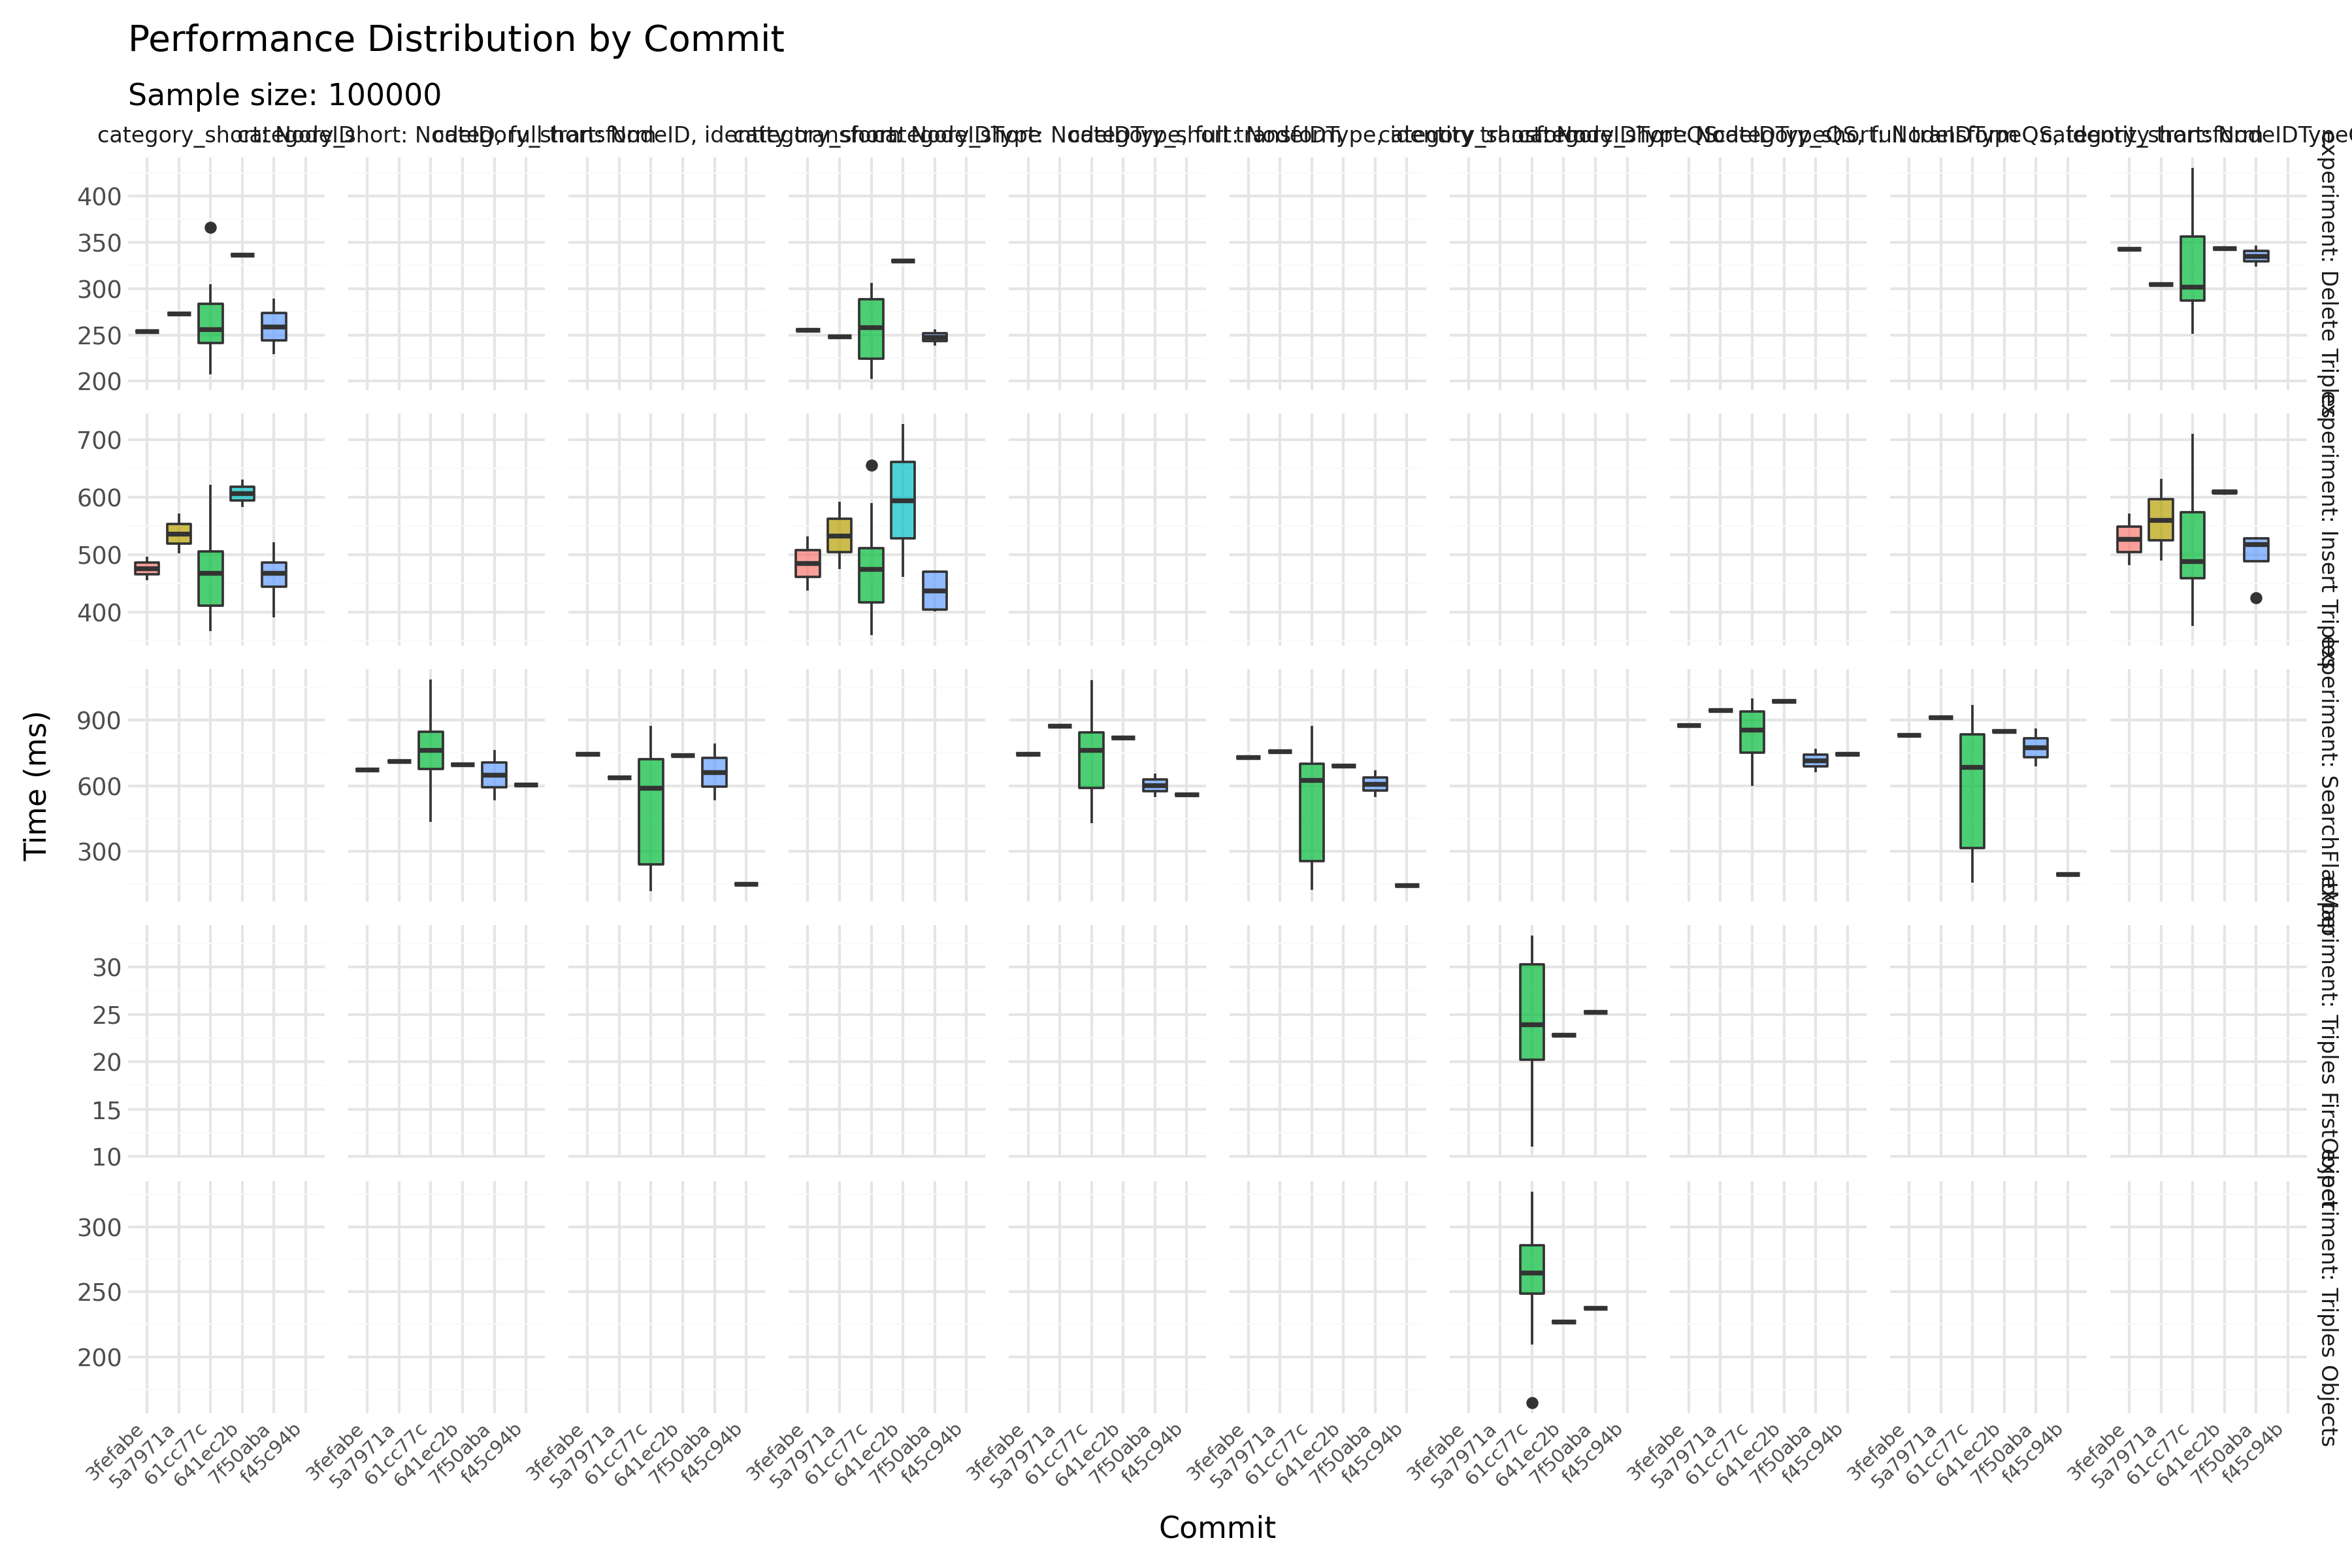

In [28]:
# Plot performance distribution
plot_performance_distribution(
    dfr,
    output_path='performance_distribution.png'
)

Image('performance_distribution.png')

## Experiment-Specific Analysis

Deep dive into specific experiment types.

In [29]:
# Show available experiments
experiments = dfr['experiment'].unique()
print(f"Available experiments: {list(experiments)}")

Available experiments: ['Triples FirstObject', 'Triples Objects', 'Delete Triples', 'Insert Triples', 'SearchFlatMap', 'TripleIndex Class Insert']


In [30]:
# Analyze a specific experiment (change this to analyze different experiments)
selected_experiment = 'Insert Triples'  # Change this as needed

if selected_experiment in dfr['experiment'].values:
    print(f"\nAnalyzing: {selected_experiment}\n")

    # Filter data for this experiment
    exp_data = dfr[dfr['experiment'] == selected_experiment].copy()

    # Show summary by commit
    exp_summary = exp_data.groupby(['commit_id', 'category', 'sampleSize']).agg({
        'avg_ns': 'mean',
        'p99_ns': 'mean'
    }).reset_index()

    exp_summary['avg_ms'] = exp_summary['avg_ns'] / 1_000_000
    exp_summary['p99_ms'] = exp_summary['p99_ns'] / 1_000_000

    exp_summary[['commit_id', 'category', 'sampleSize', 'avg_ms', 'p99_ms']].round(2)
else:
    print(f"Experiment '{selected_experiment}' not found in data")


Analyzing: Insert Triples



## Percentage Change Analysis

Calculate percentage change between consecutive commits.

In [31]:
# Calculate percentage change between consecutive commits
summary_sorted = summary.sort_values('date').reset_index(drop=True)
summary_sorted['pct_change'] = summary_sorted['mean_time_ms'].pct_change() * 100

print("Percentage change in mean time between commits:\n")
summary_sorted[['commit_id', 'date', 'mean_time_ms', 'pct_change']].round(2)

Percentage change in mean time between commits:



,commit_id,date,mean_time_ms,pct_change
0,5a7971a652020d4100ba6d59442c93dfff83b823,2025-11-30 13:19:48+00:00,183.91,NaN
1,641ec2bc53704f742c22322507a08c2e31adb903,2025-11-30 14:19:47+00:00,173.31,-5.76
2,7f50aba95e12807e5361dec8b96a91532066e836,2025-11-30 14:47:04+00:00,149.78,-13.58
3,7f50aba95e12807e5361dec8b96a91532066e836,2025-11-30 18:57:11+00:00,47.74,-68.13
4,7f50aba95e12807e5361dec8b96a91532066e836,2025-11-30 19:41:53+00:00,54.65,14.47
5,7f50aba95e12807e5361dec8b96a91532066e836,2025-11-30 19:45:21+00:00,51.52,-5.73
6,7f50aba95e12807e5361dec8b96a91532066e836,2025-11-30 19:54:39+00:00,51.63,0.21
7,3fefabe36378b072ddbc17bb6b85bbd0dee4bc2e,2025-12-01 21:07:23+00:00,116.73,126.11
8,3fefabe36378b072ddbc17bb6b85bbd0dee4bc2e,2025-12-01 21:43:38+00:00,35.99,-69.17
9,f45c94b312a5e15a373a108246c714f9cd8ea348,2025-12-02 08:12:05+00:00,129.15,258.86


## Custom Analysis: Compare Two Specific Commits

In [32]:
# Specify two commits to compare (use first 7 characters)
commit_a = unique_commits[0][:7] if len(unique_commits) > 0 else None
commit_b = unique_commits[-1][:7] if len(unique_commits) > 1 else None

if commit_a and commit_b and commit_a != commit_b:
    print(f"Comparing {commit_a} vs {commit_b}\n")

    # Filter data for these commits
    data_a = dfr[dfr['commit_id'].str.startswith(commit_a)].copy()
    data_b = dfr[dfr['commit_id'].str.startswith(commit_b)].copy()

    # Aggregate by experiment/category/sampleSize
    agg_a = data_a.groupby(['experiment', 'category', 'sampleSize'])['avg_ns'].mean()
    agg_b = data_b.groupby(['experiment', 'category', 'sampleSize'])['avg_ns'].mean()

    # Compare
    comparison = pd.DataFrame({
        f'{commit_a}_ms': agg_a / 1_000_000,
        f'{commit_b}_ms': agg_b / 1_000_000,
    })
    comparison['diff_ms'] = comparison[f'{commit_b}_ms'] - comparison[f'{commit_a}_ms']
    comparison['pct_change'] = (comparison['diff_ms'] / comparison[f'{commit_a}_ms']) * 100

    comparison.round(2)
else:
    print("Not enough commits for comparison")

Comparing 5a7971a vs 61cc77c



## Export Results

In [33]:
# Save processed data for further analysis
dfr.to_csv('benchmark_data_processed.csv', index=False)
summary.to_csv('performance_summary.csv', index=False)

print("Saved:")
print("  - benchmark_data_processed.csv")
print("  - performance_summary.csv")

Saved:
  - benchmark_data_processed.csv
  - performance_summary.csv
